In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel('product_category_results_pooled.xlsx', header=2)
df.head()

,Unnamed: 0,Apparel,Automotive,Baby,Beauty,Books,Camera,Digital_Ebook_Purchase,Digital_Music_Purchase,Digital_Software,...,Shoes,Software,Sports,Tools,Toys,Video,Video_DVD,Video_Games,Watches,Wireless
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mktrf_l,2.620,-0.116,2.687,5.439,-0.419,-0.414,0.119,0.280,10.635,...,1.296,0.084,-7.869,-6.487**,-4.139**,3.368,0.125,-1.867,0.093,-17.360***
2,NaN,(0.61),(-0.01),(0.78),(0.93),(-1.02),(-0.15),(0.03),(0.12),(0.71),...,(0.26),(0.02),(-1.39),(-2.00),(-1.97),(1.37),(0.14),(-1.09),(0.02),(-3.73)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,log_amznvol,0.109***,0.188***,0.021,-0.015,0.153***,0.052***,0.130***,0.088***,0.216***,...,0.031,0.329***,0.192***,0.169***,0.032**,0.026,0.211***,0.071***,0.039,0.100***


In [25]:
df1 = df.iloc[[1]]
df1.head()

,Unnamed: 0,Apparel,Automotive,Baby,Beauty,Books,Camera,Digital_Ebook_Purchase,Digital_Music_Purchase,Digital_Software,...,Shoes,Software,Sports,Tools,Toys,Video,Video_DVD,Video_Games,Watches,Wireless
1,mktrf_l,2.620,-0.116,2.687,5.439,-0.419,-0.414,0.119,0.280,10.635,...,1.296,0.084,-7.869,-6.487**,-4.139**,3.368,0.125,-1.867,0.093,-17.360***


In [26]:
df2 = df1.transpose().reset_index()
df2.columns=['industry','mktrf_l']
df2 = df2[1:]
df2.head()

,industry,mktrf_l
1,Apparel,2.620
2,Automotive,-0.116
3,Baby,2.687
4,Beauty,5.439
5,Books,-0.419


In [27]:
df2["mktrf_l_val"] = df2["mktrf_l"].str.extract(r"(-?\d+\.\d+|\d+)", expand=False).astype(float)
df2["mktrf_l_sig"] = df2["mktrf_l"].str.extract(r"(\*+)", expand=False).fillna("")  # Extract the stars
df2.head()

,industry,mktrf_l,mktrf_l_val,mktrf_l_sig
1,Apparel,2.620,2.620,
2,Automotive,-0.116,-0.116,
3,Baby,2.687,2.687,
4,Beauty,5.439,5.439,
5,Books,-0.419,-0.419,


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 1 to 43
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   industry     43 non-null     object 
 1   mktrf_l      43 non-null     object 
 2   mktrf_l_val  43 non-null     float64
 3   mktrf_l_sig  43 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [29]:
df2['mktrf_l_sig'].value_counts()

mktrf_l_sig
       37
**      3
*       2
***     1
Name: count, dtype: int64

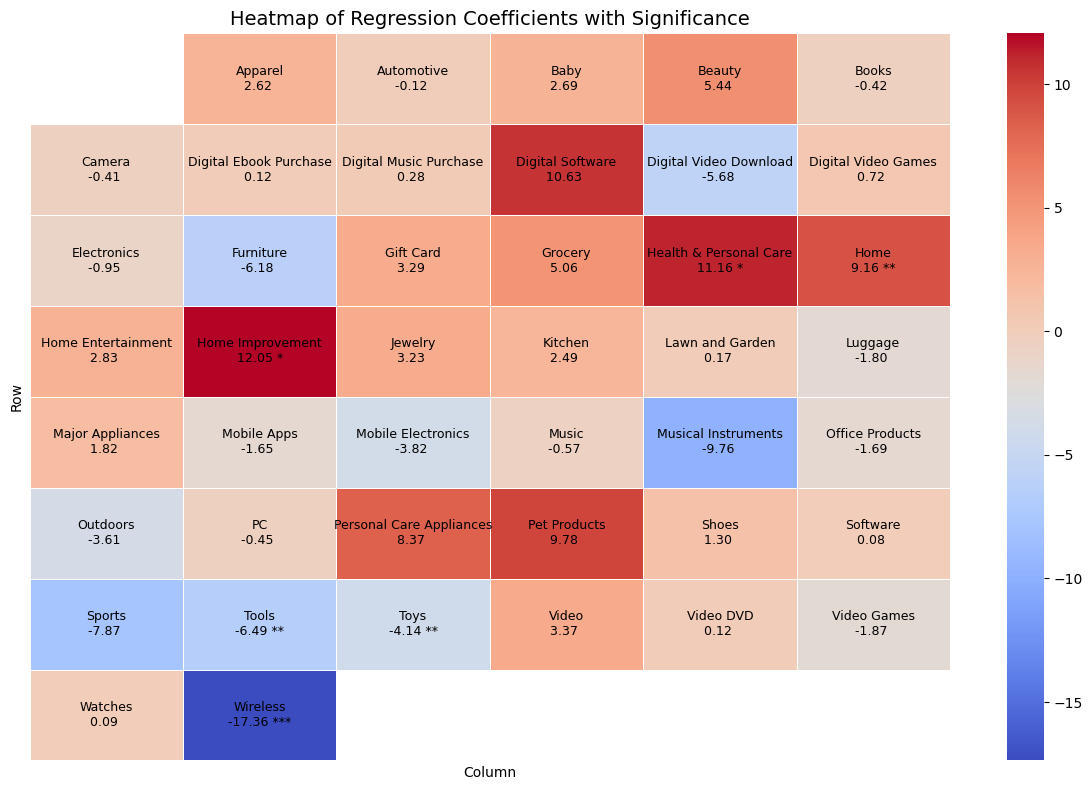

In [36]:
df2['industry'] = df2['industry'].apply(lambda x: x.replace('_', ' '))
df2 = df2.sort_values(by='mktrf_l_val').reindex()

n_rows = 6  # Number of rows in the reshaped heatmap
df2["Row"] = df2.index // n_rows  # Create row groups
df2["Column"] = df2.index % n_rows  # Create column groups

heatmap_data = df2.pivot(index="Row", columns="Column", values="mktrf_l_val")
annotations = df2.pivot(index="Row", columns="Column", values="mktrf_l_sig")
industries = df2.pivot(index="Row", columns="Column", values="industry")

# Step 2: Plot the Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size to fit A4 paper
ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, linewidths=0.5)

# Step 3: Annotate Heatmap with Coefficients and Stars
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        coeff = heatmap_data.iloc[i, j]
        star = annotations.iloc[i, j] if not pd.isna(annotations.iloc[i, j]) else ""
        industry = industries.iloc[i, j] if not pd.isna(industries.iloc[i, j]) else ""
        text = f"{coeff:.2f} {star}" if not pd.isna(coeff) else ""
        ax.text(j + 0.5, i + 0.5, f"{industry}\n{text}", ha="center", va="center", fontsize=9)

# Step 4: Adjust Layout
plt.title("Heatmap of Regression Coefficients with Significance", fontsize=14)
plt.xticks([])  # Remove x-axis labels (column numbers are artificial)
plt.yticks([])  # Remove y-axis labels (row numbers are artificial)
plt.tight_layout()

# Show the Heatmap
plt.show()

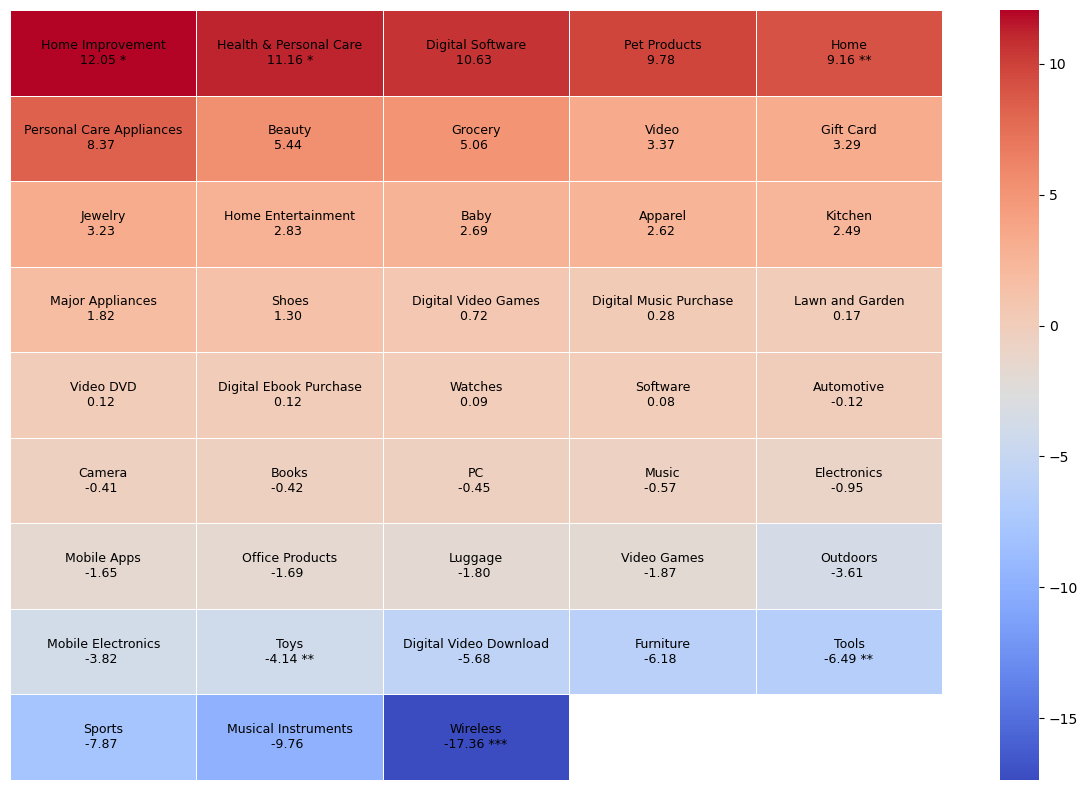

In [42]:
df2['industry'] = df2['industry'].apply(lambda x: x.replace('_', ' '))
df2 = df2.sort_values(by='mktrf_l_val', ascending=False).reset_index(drop=True)

# Step 2: Create Row and Column groups
n_rows = 5  # Number of rows in the heatmap grid
df2["Row"] = df2.index // n_rows  # Group by rows
df2["Column"] = df2.index % n_rows  # Group by columns

# Step 3: Reshape for Heatmap
heatmap_data = df2.pivot(index="Row", columns="Column", values="mktrf_l_val")
annotations = df2.pivot(index="Row", columns="Column", values="mktrf_l_sig")
industries = df2.pivot(index="Row", columns="Column", values="industry")

# Step 4: Plot the Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, linewidths=0.5)

# Step 5: Annotate the Heatmap with Coefficients and Stars
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        coeff = heatmap_data.iloc[i, j]
        star = annotations.iloc[i, j] if not pd.isna(annotations.iloc[i, j]) else ""
        industry = industries.iloc[i, j] if not pd.isna(industries.iloc[i, j]) else ""
        text = f"{coeff:.2f} {star}" if not pd.isna(coeff) else ""
        ax.text(j + 0.5, i + 0.5, f"{industry}\n{text}", ha="center", va="center", fontsize=9)

# Step 6: Adjust Layout
plt.title("Heatmap of Regression Coefficients with Significance", fontsize=14)
plt.title('')
plt.xticks([])  # Remove artificial column labels
plt.xlabel('')
plt.yticks([])  # Remove artificial row labels
plt.ylabel('')
plt.tight_layout()
plt.savefig("heatmap.png", format="png", dpi=600)
# Show the Heatmap
plt.show()